In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coursera-1000-courses-dataset/coursera_1000_Courses


In [3]:
df = pd.read_csv('/kaggle/input/coursera-1000-courses-dataset/coursera_1000_Courses')
df

,Unnamed: 0,Course_Banner,Course_Name,Company_Name,Skills,Ratings,Reviews,Difficulty,Type_Of_Certificate,Duration
0,0,https://d3njjcbhbojbot.cloudfront.net/api/util...,Google Cybersecurity,Google,"Skills you'll gain: Network Security, Python P...",4.8,(19K reviews),Beginner,Professional Certificate,3 - 6 Months
1,1,https://d3njjcbhbojbot.cloudfront.net/api/util...,Google Data Analytics,Google,"Skills you'll gain: Data Analysis, R Programmi...",4.8,(136K reviews),Beginner,Professional Certificate,3 - 6 Months
2,2,https://d3njjcbhbojbot.cloudfront.net/api/util...,Google Project Management:,Google,"Skills you'll gain: Project Management, Strate...",4.8,(100K reviews),Beginner,Professional Certificate,3 - 6 Months
3,3,https://d3njjcbhbojbot.cloudfront.net/api/util...,IBM Data Science,IBM,"Skills you'll gain: Python Programming, Data S...",4.6,(120K reviews),Beginner,Professional Certificate,3 - 6 Months
4,4,https://d3njjcbhbojbot.cloudfront.net/api/util...,Google Digital Marketing & E-commerce,Google,"Skills you'll gain: Digital Marketing, Marketi...",4.8,(23K reviews),Beginner,Professional Certificate,3 - 6 Months
...,...,...,...,...,...,...,...,...,...,...
995,995,https://d3njjcbhbojbot.cloudfront.net/api/util...,Core 1: Hardware and Network Troubleshooting,IBM,(13 reviews),4.5,Advanced Â· Course Â· 1 - 3 Months,NaN,NaN,NaN
996,996,https://d3njjcbhbojbot.cloudfront.net/api/util...,Coding Interview Preparation,Meta,"Skills you'll gain: Algorithms, Computer Scien...",4.7,(349 reviews),NaN,NaN,NaN
997,997,https://d3njjcbhbojbot.cloudfront.net/api/util...,Newborn Baby Care,University of Colorado System,Skills you'll gain: Critical Thinking,4.8,(940 reviews),NaN,NaN,NaN
998,998,https://d3njjcbhbojbot.cloudfront.net/api/util...,Collaboration For Everyone,Arizona State University,Beginner Â· Specialization Â· 3 - 6 Months,NaN,NaN,NaN,NaN,NaN


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


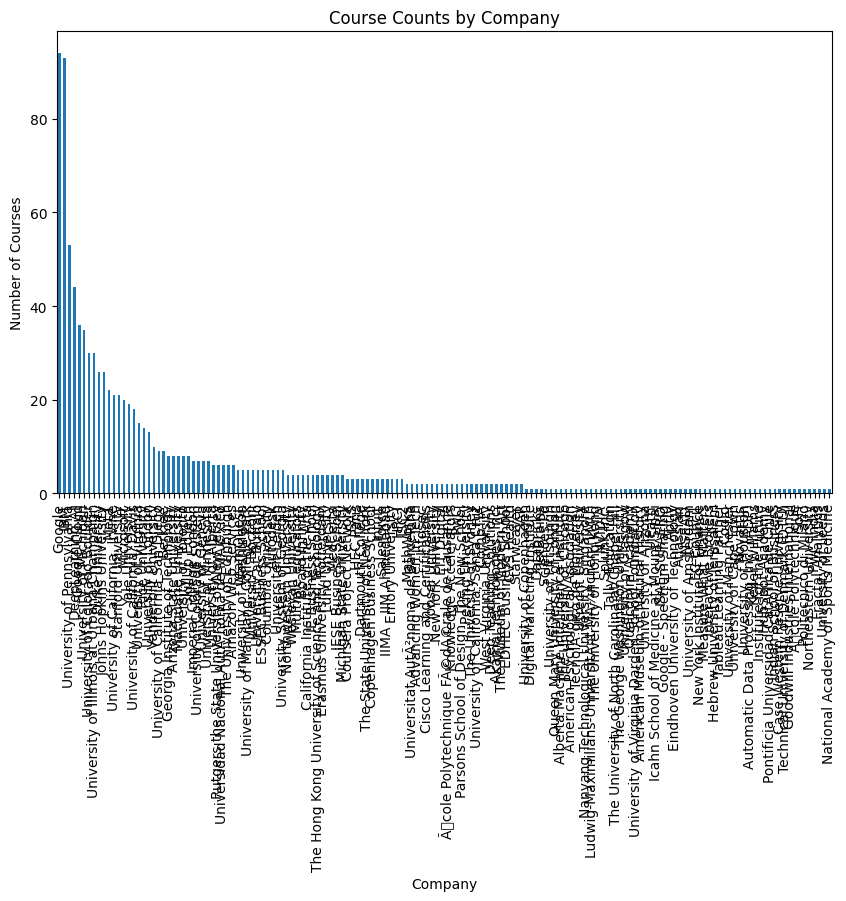

In [5]:
course_count_by_company = df['Company_Name'].value_counts()
course_count_by_company.plot(kind='bar', figsize=(10, 6))
plt.title('Course Counts by Company')
plt.xlabel('Company')
plt.ylabel('Number of Courses')
plt.show()

**Histogram for the rating of the courses by user/students**

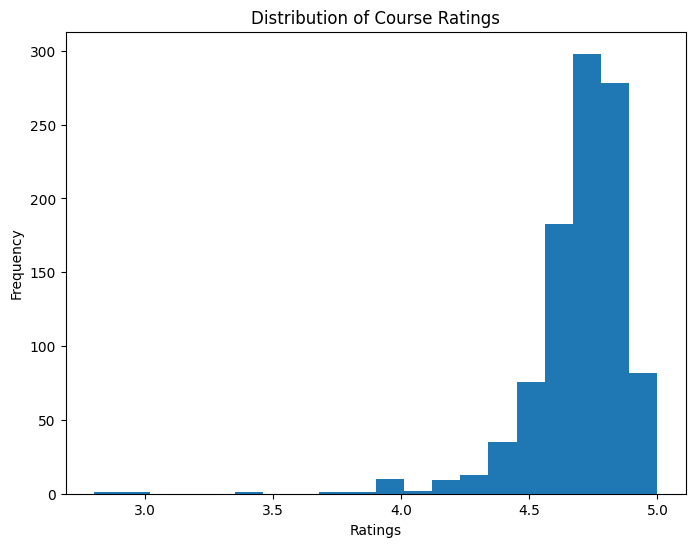

In [6]:
df['Ratings'] = df['Ratings'].apply(lambda x: float(re.search(r'\d+\.\d+', str(x)).group()) if re.search(r'\d+\.\d+', str(x)) else None)
df['Ratings'].plot(kind='hist', bins=20, figsize=(8, 6))
plt.title('Distribution of Course Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


**Histogram of Review**

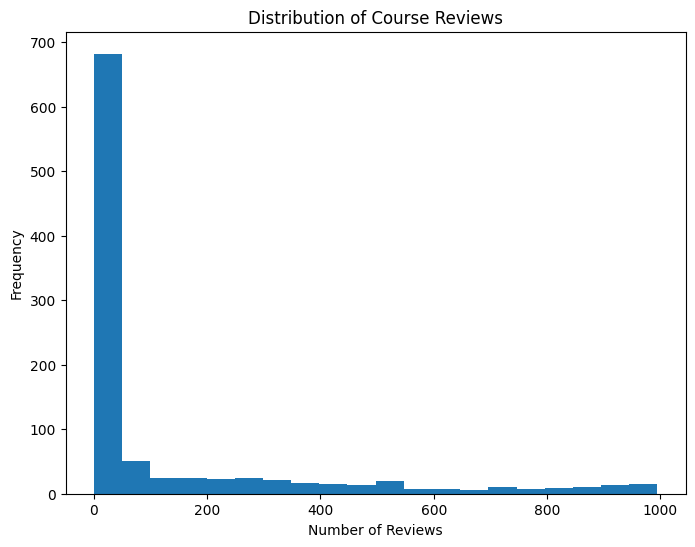

In [7]:
df['Reviews'] = df['Reviews'].fillna(0).apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None)
df['Reviews'].plot(kind='hist', bins=20, figsize=(8, 6))
plt.title('Distribution of Course Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

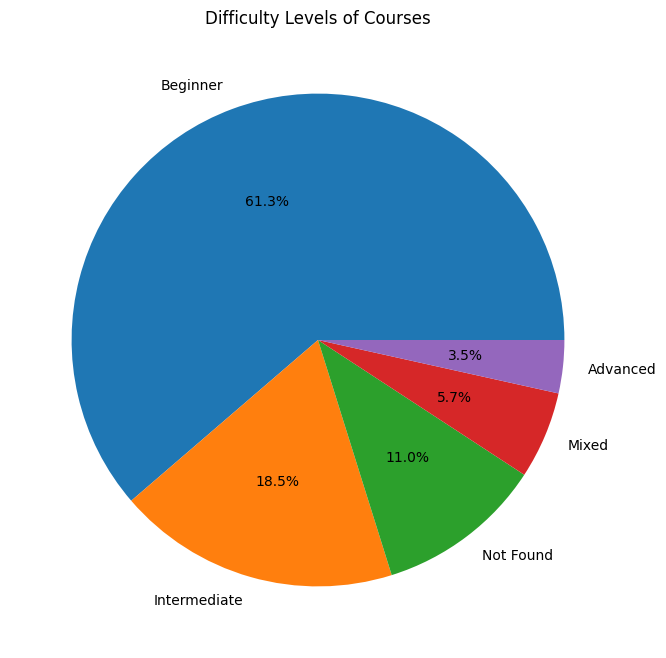

In [8]:
difficulty_counts = df['Difficulty'].value_counts()
difficulty_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Difficulty Levels of Courses')
plt.ylabel('')
plt.show()

**Highest ranked Courses**

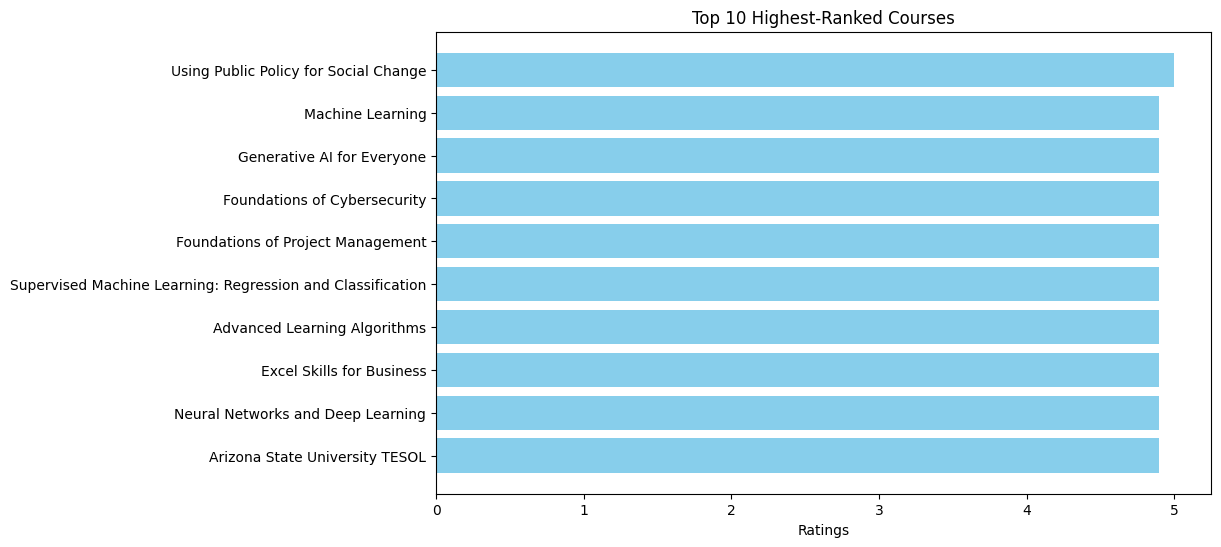

In [9]:
df['Ratings'] = df['Ratings'].astype(str).str.extract('(\d+\.\d+)', expand=False).astype(float)
top_10_courses = df.nlargest(10, 'Ratings')
plt.figure(figsize=(10, 6))
plt.barh(top_10_courses['Course_Name'], top_10_courses['Ratings'], color='skyblue')
plt.xlabel('Ratings')
plt.title('Top 10 Highest-Ranked Courses')
plt.gca().invert_yaxis() 
plt.show()

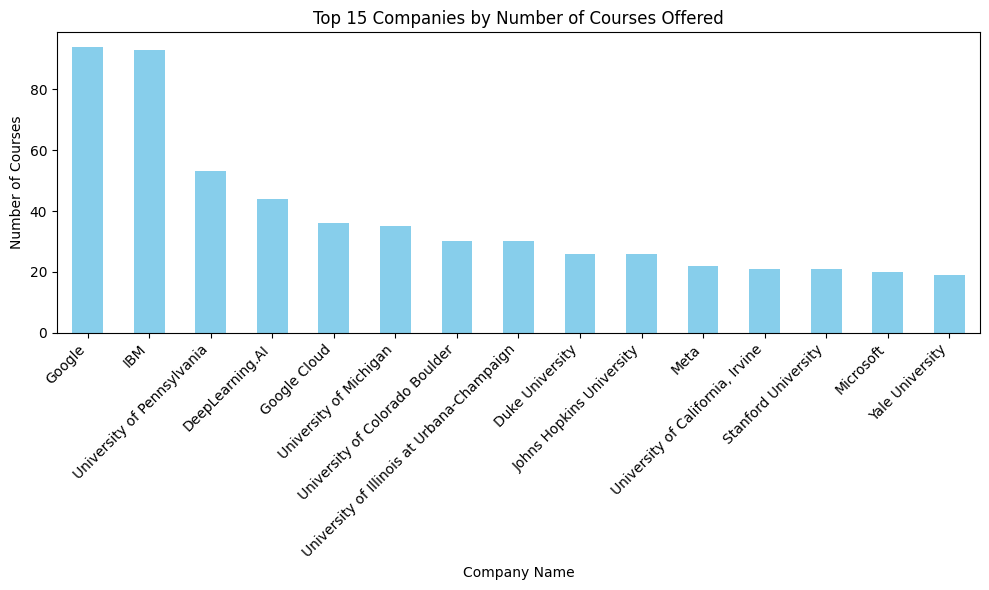

In [10]:
company_course_counts = df['Company_Name'].value_counts().head(15)
plt.figure(figsize=(10, 6))
company_course_counts.plot(kind='bar', color='skyblue')
plt.title('Top 15 Companies by Number of Courses Offered')
plt.xlabel('Company Name')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

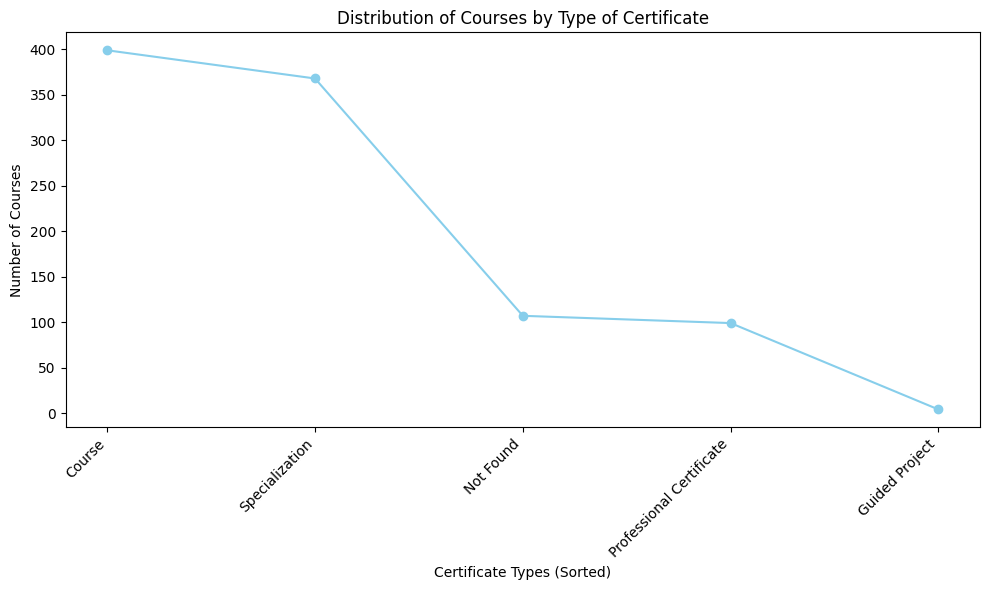

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Getting the counts of courses by type of certificate
certificate_counts = df['Type_Of_Certificate'].value_counts()

# Sorting the certificate counts in descending order and converting to DataFrame
certificate_counts_df = certificate_counts.sort_values(ascending=False).reset_index()
certificate_counts_df.columns = ['Certificate_Type', 'Count']  # Renaming columns for clarity

# Plotting courses by type of certificate using a line plot
plt.figure(figsize=(10, 6))
plt.plot(certificate_counts_df.index, certificate_counts_df['Count'], marker='o', color='skyblue')
plt.title('Distribution of Courses by Type of Certificate')
plt.xlabel('Certificate Types (Sorted)')
plt.ylabel('Number of Courses')
plt.xticks(certificate_counts_df.index, certificate_counts_df['Certificate_Type'], rotation=45, ha='right')
plt.tight_layout()
plt.show()


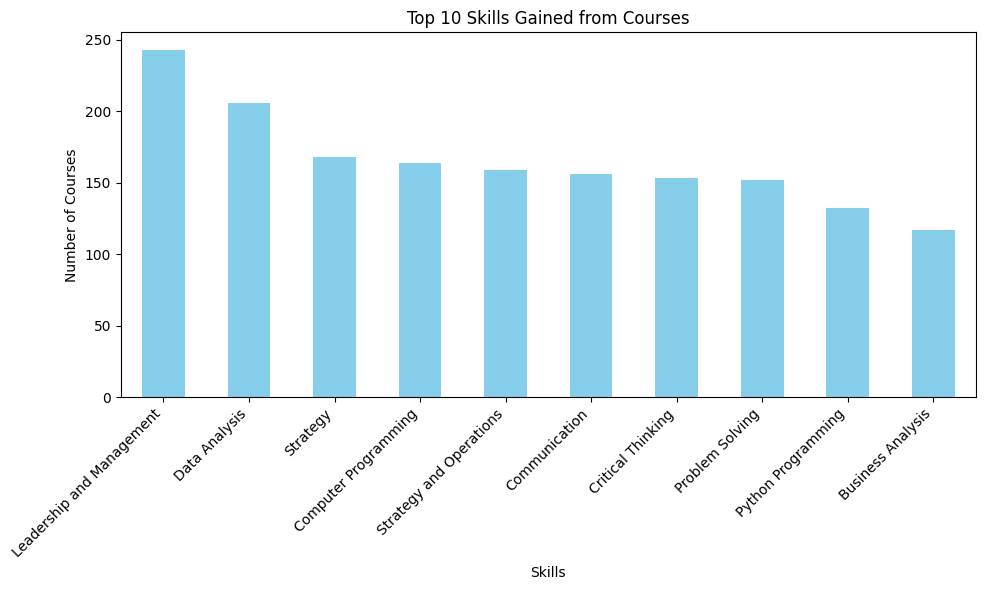

In [12]:
all_skills = df['Skills'].str.split(', ').explode()
skills_counts = all_skills.value_counts()
plt.figure(figsize=(10, 6))
skills_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Skills Gained from Courses')
plt.xlabel('Skills')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()
